# Task 2


In [61]:
# Handle imports
import imageio
import numpy as np
from os import listdir
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from matplotlib import pyplot as plt


a) Write a function that takes as an input matrix T of vectorized images from subset 0. The output of this function are the 20 first singular vectors U[:, 1], . . . , U[:, 20] . Display the first 3 vectors as images, i.e., reshape them to size 50×50 and display them.

In [27]:
# Load each subset of data
subset_vals = [0, 1, 2, 3, 4]
img_height = 50
img_width = 50
max_uint8 = 2**8 - 1
directory = 'yaleBfaces'
subsets = {}
labels = {}

for val in subset_vals:
    subset_name = 'subset' + str(val)
    # get all filenames inside folder
    filenames = listdir(directory + '/' + subset_name)
    # initialise array
    num_files = len(filenames)
    subsets[val] = np.zeros((img_height * img_width, num_files))
    labels[val] = np.zeros(num_files)
    # load all files into particular subset
    samp = 0
    for fname in filenames:
        curr_fname = directory + '/' + subset_name + '/' + fname
        subsets[val][:, samp] = np.reshape(np.array(imageio.imread(curr_fname)) / max_uint8, (img_height * img_width))
        labels[val][samp] = int(fname[6:8])
        samp += 1

# X = np.zeros((IMG_HEIGHT * IMG_WIDTH, MAX_SAMPS * len(classes)))
# C = np.zeros((MAX_SAMPS * len(classes), len(classes)))
# col = 0
# for lab in classes:
#     for samp in range(1, MAX_SAMPS + 1):
#         filename = 'mnist/d' + str(lab) + '/d' + str(lab) + '_%04d.png' % samp
#         X[:, col] = np.reshape(np.array(imageio.imread(filename)) / MAX_UINT8, (IMG_HEIGHT * IMG_WIDTH), 1)
#         C[col, classes.index(lab)] = 1
#         col = col + 1


In [33]:
# Function which takes in matrix T and returns 20 first singular vectors
def pcomponents(T, k):
    # centre T (p x N matrix)
    mu = np.mean(T, axis = 1).reshape(T.shape[0], 1)
    T_c = T - mu
    # take SVD of T_c
    U, Sigma, VT = np.linalg.svd(T_c, full_matrices = False)
    # return first k singular vectors
    return U[:, 0:20]

In [36]:
# Apply function to subset 0
T = subsets[0]
k = 20
U = pcomponents(T, k)

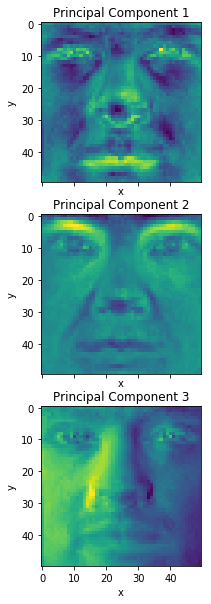

In [37]:
# Display first three prinicipal component vectors as images

U_visual = {}
num_vecs = 3

# reshape columns of Uk
for col in range(0, num_vecs):
    U_visual[col] = U[:, col].reshape(img_height, img_width)

# plot resulting images
f, axarr = plt.subplots(num_vecs, sharex=True, figsize=(10,10))
for col in range(0, num_vecs):
    axarr[col].set_title('Principal Component ' + str(col + 1))
    axarr[col].imshow(Uk_visual[col][:, :])
    axarr[col].set_xlabel('x')
    axarr[col].set_ylabel('y')

 
plt.show()

b) Write a function that takes as an input the training set T (a matrix composed of
vectorized pictures from subset 0), a vector containing the labels of the training
set (i.e., if the the i-th sample belongs to class j, the i-th entry of the labels vector
is j. In this exercise j is an integer between 1 and 10), the test samples S (a
matrix composed of vectorized pictures from subsets 1-4) and the corresponding
labels (in a separate vector), the 20 singular vectors from the rst step, and
the parameter k that denotes how many of the PCs are used. Use the Euclidean
distance to classify each sample image based on its three nearest neighbors. (This
is done by comparing the test samples with the training samples in the reduced
space.) As an output give the fraction of images from S that were misclassied,
i.e., the error rate. Repeat this for subsets 1 through 4 and for k = 1, . . . , 20.
Plot the error rate for each subset.

In [76]:
# define function for calculating error
def calc_error_knn_pca(T, T_labs, S, S_labs, U, k):
    # T/S is p x N matrix (N varying according to samples in subset)
    # T_labs / S_labs is size N vector
    # U is p x 20 matrix
    # k is scalar value
    
    model = KNN(n_neighbors = 3)
    Uk = U[:, 0:k]
    # Apply PC transformation for dimensionality reduction
    UkT = np.transpose(Uk)
    T_new = np.dot(UkT, T)
    S_new = np.dot(UkT, S)
    # Train KNN on T_new
    model.fit(np.transpose(T_new), T_labs)
    # Test KNN on S
    acc = model.score(np.transpose(S_new), S_labs)
    # Output fraction of misclassified samples
    return 1 - acc

In [91]:
# calculate errors for each subset and k value

k_vals = range(1, 21)
err = {}

T = subsets[0]
T_labs = labels[0]

# loop through all subsets
for val in subset_vals[1:]:


    err[val] = np.zeros(len(k_vals))
    
    # calculate error as k increases
    index_counter = 0
    for k in k_vals:
        S = subsets[val]
        S_labs = labels[val]
        err[val][index_counter] = calc_error_knn_pca(T, T_labs, S, S_labs, U, k)
        index_counter += 1

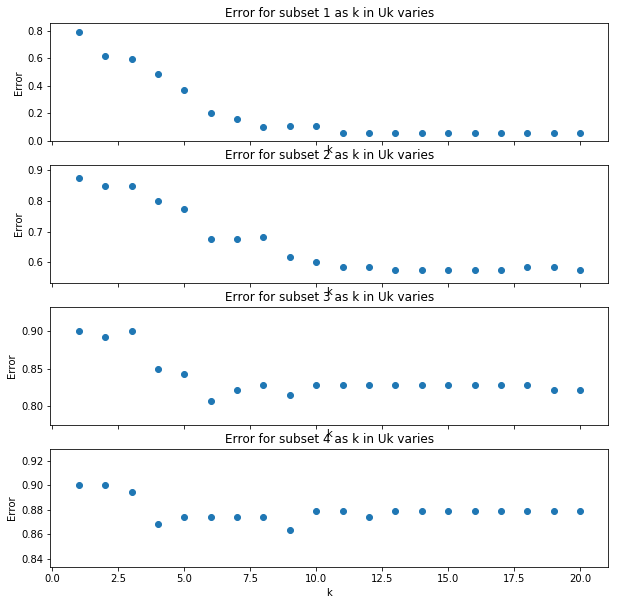

In [92]:
# plot errors

f, axarr = plt.subplots(len(subset_vals[1:]), sharex=True, figsize=(10,10))

subplt_index = 0
for val in subset_vals[1:]:
    axarr[subplt_index].scatter(k_vals, err[val])
    axarr[subplt_index].set_title('Error rate for subset ' + str(val) + ' as k in Uk varies')
    axarr[subplt_index].set_xlabel('k')
    axarr[subplt_index].set_ylabel('Error rate')

    subplt_index += 1

c) Repeat the above experiment without using the rst three singular vectors, i.e.,
use k = 1, . . . , 17 singular vectors starting from the 4-th. Plot the error rate as
before. How do you explain the dierence in recognition rate?

In [93]:
# modify U to remove first three columns of k
U_mod = U[:, 3:]

# calculate errors for each subset and k value

k_vals_mod = range(1, 18)
err_mod = {}

T = subsets[0]
T_labs = labels[0]

# loop through all subsets
for val in subset_vals[1:]:

    err_mod[val] = np.zeros(len(k_vals_mod))
    
    # calculate error as k increases
    index_counter = 0
    for k in k_vals_mod:
        S = subsets[val]
        S_labs = labels[val]
        err_mod[val][index_counter] = calc_error_knn_pca(T, T_labs, S, S_labs, U_mod, k)
        index_counter += 1

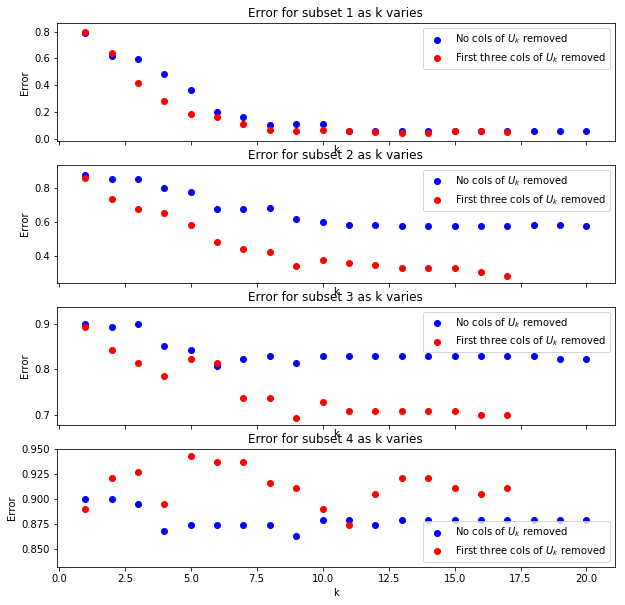

In [94]:
# plot errors

f, axarr = plt.subplots(len(subset_vals[1:]), sharex=True, figsize=(10,10))

subplt_index = 0
for val in subset_vals[1:]:
    axarr[subplt_index].scatter(k_vals, err[val], color='blue', label='No cols of $U_k$ removed')
    axarr[subplt_index].scatter(k_vals_mod, err_mod[val], color='red', label='First three cols of $U_k$ removed')
    axarr[subplt_index].set_title('Error rate for subset ' + str(val) + ' as k in Uk varies')
    axarr[subplt_index].set_xlabel('k')
    axarr[subplt_index].set_ylabel('Error rate')
    axarr[subplt_index].legend()

    subplt_index += 1

Classification ability is dependent on how good prinicipal components are good at separating samples according to labels, as opposed to variance of samples. 

It seems that for subset 1, it does not particularly matter whether first three cols of $U_k$ are removed or not. This may be because the first three principal components are as good at separating samples by labels compared to other principal components.

For subsets 2 and 3, removing the first three cols of $U_k$ has caused better performance. This may be because even though the first three components capture more variance in the samples, perhaps the other components are better at separating samples by labels, allowing KNN to correctly classify samples.

For the last subset, removing first three cols of $U_k$ seems to have resulted in worse performance. This may be because the first three principal components are better at separating samples by labels compared to the other principal components. However, note that both errors remained quite high (around 0.9), so the strength of this analysis is not as strong as the analysis of the other subsets.